# Chromosomes and genetic operators for real numbers

- We will focus on number representation and genetic operators for real numbers.
- 


## Eggholder Function

```{figure} ./../img/2024-04-30-13-13-35.png
---
align: center
---

he Eggholder function
Source: https://en.wikipedia.org/wiki/File:Eggholder_function.pdf. Image by Gaortizg.
Licensed under Creative Commons CC BY-SA 3.0: https://creativecommons.org/licenses/by-sa/3.0/deed.en
Explore more here: https://www.sfu.ca/~ssurjano/egg.htmlhttps://www.sfu.ca/~ssurjano/egg.html

```

The eggholder function is a mathematical function often used as a benchmark problem for optimization algorithms. It's designed to be challenging due to its complex landscape with multiple local minima and one global minimum. The function is defined as:

```{math}
f(x,y) = -(y + 47) \sin\left(\sqrt{\left| \frac{x}{2} + (y + 47) \right|}\right) - x \sin\left(\sqrt{\left| x - (y + 47) \right|}\right)
```

The function has a global minimum at \( f(512, 404.2319) = -959.6407 \), which is surrounded by several local minima and maxima. The "eggholder" name comes from the visual appearance of the function's plot, which somewhat resembles an egg holder.

Imagine you're trying to find the lowest point on a hilly landscape, but there are many hills and valleys, and you can't see the whole picture at once. The eggholder function is like a mathematical version of this situation. It's used to test how well different methods, like optimization algorithms, can find the lowest point (the global minimum) in a complicated landscape with lots of ups and downs.

In high school, you might have learned about functions and how to find their minimum or maximum points. The eggholder function is special because it's quite tricky. It has many peaks and valleys, and finding the lowest point isn't easy. So, mathematicians and computer scientists use it to test new methods or algorithms for finding the best solution in complex situations.


## Himmelblau's function

Himmelblau's function is another famous mathematical function used as a benchmark problem in optimization. It's named after David Mautner Himmelblau, who introduced it in 1972. The function is defined as follows:

```{math}
f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 
```
Let's break it down:

1. **The Structure**: Himmelblau's function is made up of two polynomial terms, each squared and added together.

2. **The Variables**: The function depends on two variables, \( x \) and \( y \), which represent coordinates on a 2D plane.

3. **The Squares**: Each term in the function is squared. Squaring ensures that all parts of the function are positive, which can create multiple local minima and maxima.

4. **The Constants**: The numbers 11 and 7 in the function are constants.

5. **The Summation**: The squared terms are added together to form a single value, which represents the height of the function's surface at a given point \( (x,y) \).

6. **The Objective**: The goal is to find the minimum value of the function, which corresponds to the lowest point on its surface.

Himmelblau's function is particularly interesting because it has four identical local minima, each with a value of 0, and one global minimum also at 0. These minima are located at the points:

```{math}
(3, 2), \ (-2.805118, 3.131312), \ (-3.779310, -3.283186), \ \text{and} \ (3.584428, -1.848126)
```

These points are like valleys in the landscape represented by the function, and finding them can be challenging due to the function's complex structure with multiple hills and valleys.

In optimization, scientists and engineers use Himmelblau's function to test and compare different optimization algorithms. The efficiency of an algorithm is measured by how quickly and accurately it can find the global minimum (the lowest point) of the function. If an algorithm can efficiently navigate the landscape of Himmelblau's function to find the minima, it's likely to perform well on other optimization problems too.

## Real Coded Operators


(blend-crossover)=
### Blend Crossover
- Blend Crossover. (BLX)

```{math}
\left[\text { parent }_1-\alpha\left(\text { parent }_2-\text { parent }_1\right), \text { parent }_2+\alpha\left(\text { parent }_2-\text { parent }_1\right)\right]
```

he `α` value is commonly set to `0.5`, resulting in a selection interval twice as wide
as the interval between the parents.

(simulated-binary-crossover)=
### Simulated Binary Crossover
- Simulated Binary Crossover. (SLX)


```{math}
\begin{aligned}
& \text { offspring }_1=\frac{1}{2}\left[(1+\beta) \text { parent }_1+(1-\beta) \text { parent }_2\right] \\
& \text { offspring }_2=\frac{1}{2}\left[(1-\beta) \text { parent }_1+(1+\beta) \text { parent }_2\right]
\end{aligned}
```

The value of `β`, also known as the `spread factor`, is calculated using a combination of a randomly chosen value and a pre-determined parameter known as `η (eta`), distribution index, or crowding factor. With larger values of `η`, offspring will tend to be more similar to their parents. Common values of `η` are between `10` and `20`.

### Normally Distributed (or Gaussian) Mutation

Original Value is placed with a random number generated using normal distribution wit predetermined values for mean and standard deviation.

### cxSimulatedBinaryBounded

is a bounded version of [`cxSimulateBinary()`](simulated-binary-crossover) operator, accepting the arguments `low` and `up` as the lower and upper boundaries of the search space, respectively 











## TASK: Using DEAP to calculate individual fitness using Eggholder


When calling the implementation:

```python
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with elitism:
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# print info for best solution found:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])

# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

plt.show()
```

```{figure} ./../img/2024-04-30-14-21-04.png
---
align: center
---

Expected Output.

```

Complete the following template:

```python
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import elitism

# problem constants:
DIMENSIONS = 2  # number of dimensions
BOUND_LOW, BOUND_UP = -512.0, 512.0  # boundaries for all dimensions

# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # (try also 0.5) probability for mutating an individual
MAX_GENERATIONS = 300
HALL_OF_FAME_SIZE = 30
CROWDING_FACTOR = 20.0  # crowding factor for crossover and mutation

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# TODO define a single objective, minimizing fitness strategy:


# TODO create the Individual class based on list:



# helper function for creating random real numbers uniformly distributed within a given range [low, up]
# it assumes that the range is the same for every dimension
def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

# TODO create an operator that randomly returns a float in the desired range and dimension:


# TODO create the individual operator to fill up an Individual instance:


# TODO create the population operator to generate a list of individuals:



# TDOO Complete Eggholder function as the given individual's fitness:
def eggholder(individual):
    x = individual[0]
    y = individual[1]
    # TODO implement the Eggholder function: f(x, y) = (- (y + 47) * sin(sqrt(abs(x/2 + (y + 47)))) - x * sin(sqrt(abs(x - (y + 47))))
    
    return f,  # return a tuple

toolbox.register("evaluate", eggholder)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
"""
Given that the selection operator is independent5.
of the individual type, and we've had a good experience so far using the
tournament selection with a tournament size of 2, coupled with the elitist
approach, we'll continue to use it here. The crossover and mutation operators, on
the other hand, need to be specialized for floating-point numbers within given
boundaries, and therefore we use the DEAP-provided
cxSimulatedBinaryBounded operator for crossover, and
the mutPolynomialBounded operator for mutation:
"""

# TODO register the crossover operator: using 'mate' as tools.cxSimulatedBinaryBounded  and the crowding factor as CROWDING_FACTOR


# TODO register the mutation operator: using 'mutate' as tools.mutPolynomialBounded and the crowding factor as CROWDING_FACTOR


```


In [3]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import elitism

# problem constants:
DIMENSIONS = 2  # number of dimensions
BOUND_LOW, BOUND_UP = -512.0, 512.0  # boundaries for all dimensions

# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # (try also 0.5) probability for mutating an individual
MAX_GENERATIONS = 300
HALL_OF_FAME_SIZE = 30
CROWDING_FACTOR = 20.0  # crowding factor for crossover and mutation

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)


# helper function for creating random real numbers uniformly distributed within a given range [low, up]
# it assumes that the range is the same for every dimension
def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

# create an operator that randomly returns a float in the desired range and dimension:
toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# Eggholder function as the given individual's fitness:
def eggholder(individual):
    x = individual[0]
    y = individual[1]
    f = (-(y + 47.0) * np.sin(np.sqrt(abs(x/2.0 + (y + 47.0)))) - x * np.sin(np.sqrt(abs(x - (y + 47.0)))))
    return f,  # return a tuple

toolbox.register("evaluate", eggholder)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)




gen	nevals	min     	avg    
0  	300   	-938.344	5.74366
1  	245   	-938.344	-107.035
2  	244   	-938.344	-194.829
3  	251   	-938.344	-251.261
4  	250   	-938.344	-294.323
5  	251   	-938.344	-361.511
6  	233   	-938.344	-428.505
7  	244   	-938.344	-533.703
8  	256   	-953.949	-546.139
9  	246   	-953.949	-620.07 
10 	251   	-954.639	-706.389
11 	246   	-954.639	-775.065
12 	247   	-954.943	-765.543
13 	243   	-955.505	-773.921
14 	250   	-956.204	-785.619
15 	242   	-956.269	-788.4  
16 	237   	-956.269	-811.097
17 	242   	-956.269	-859.935
18 	244   	-956.331	-883.166
19 	245   	-956.402	-902.298
20 	241   	-956.402	-890.983
21 	246   	-956.402	-916.914
22 	248   	-956.41 	-914.176
23 	230   	-956.41 	-913.174
24 	258   	-956.41 	-905.963
25 	240   	-956.415	-903.579
26 	253   	-956.416	-904.171
27 	247   	-956.416	-908.573
28 	262   	-956.416	-896.797
29 	249   	-956.416	-890.515
30 	249   	-956.416	-892.158
31 	248   	-956.418	-900.733
32 	241   	-956.418	-905.919
33 	251   	-956.

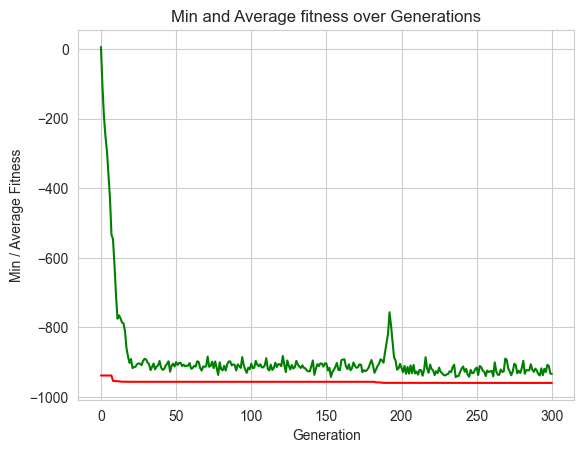

In [4]:


# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with elitism:
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# print info for best solution found:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])

# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

plt.show()
